In [103]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ensamble_model as em
import seaborn as sns
import matplotlib.pyplot as plt
import os
importlib.reload(em)

# Train Data
fd = '../../data/main_data/train/train.csv'
train = pd.read_csv(fd)

# Test Data
fd = '../../data/main_data/test/test.csv'
test = pd.read_csv(fd)

save_dir = '../saved_models'

## This is a description of how the ensamble model works and what it is doing under all of the code

The general object below is just a general_Regression object that can be changed to any model, like linear regression, Lasso, Ridge, decision tree, random forest, gradient boost regression.  You can also put in the parameters for these in the **kwargs argument, it will deal with it correctly with the names, for example max_depth=6 in a decision tree.


In [104]:
# Baseline model, what we want to beat!

general = em.general_Regression(train,type='LR')
general.perform_CV()

MSE for train: mean: 49961930100825.71 std: 1766190834328.6677
MSE for test:  mean: 52623128336150.98  std: 16157787424202.434

RMSE for train: mean: 7067261.791999064 std: 125462.60070582748
RMSE for test: mean: 7167938.034029451 std: 1115254.5343844176

R^2 for train: mean: 0.4080075808979379 std: 0.006344560557093147
R^2 for test: mean: 0.37092624578357775 std: 0.07693190732988643

MAE for train: mean: 3607039.457153544 std: 52779.976526171595
MAE for test: mean: 3660546.333153931 std: 185378.7775438796

MAPE for train: mean: 4.1040132577792185 std: 0.05894752588702268
MAPE for test: mean: 4.145168032970011 std: 0.5716244798786112



In [105]:
# experiment and look at the residuals and predictions:
bl_train = train.copy()
bl_train['pred'] = general.predict(bl_train)
bl_train['residual'] = bl_train[general.target] - bl_train['pred']
bl_train.head()

,name,dob,pos,height,foot,date,market_value,adjusted_market_value,team,league,...,accuratePass,accurateLongBalls,accurateCross,accurateKeeperSweeper,expectedAssists,expectedGoals,xGChain,xGBuildup,pred,residual
0,noah mbamba,2005-01-04,D,187.0,right,2024-02-03,3000000.0,3000000,Bayer 04 Leverkusen,Bundesliga,...,13.523810,0.619048,0.047619,0.000000,0.025627,0.001195,0.000000,0.000000,2.944756e+06,5.524426e+04
1,zachary duncan,2000-05-29,M,183.0,right,2021-11-07,300000.0,367916,AGF,Superligaen,...,9.000000,0.458333,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,1.815988e+06,-1.448072e+06
2,manuel neuer,1986-03-26,G,193.0,right,2024-10-19,4000000.0,4000000,FC Bayern München,Bundesliga,...,27.122881,5.411017,0.000000,0.495763,0.001084,0.000969,0.271096,0.270107,1.325027e+07,-9.250266e+06
3,mickel miller,1995-12-01,M,173.0,left,2024-04-12,250000.0,250000,Plymouth Argyle,Championship,...,13.837209,0.697674,0.418605,0.000000,0.067950,0.015244,0.000000,0.000000,-5.469618e+04,3.046962e+05
4,gaetano monachello,1994-03-02,F,185.0,left,2016-05-15,900000.0,1191864,Atalanta,Serie A,...,5.700000,0.200000,0.100000,0.000000,0.000000,0.111925,0.161218,0.061587,5.778338e+06,-4.586474e+06


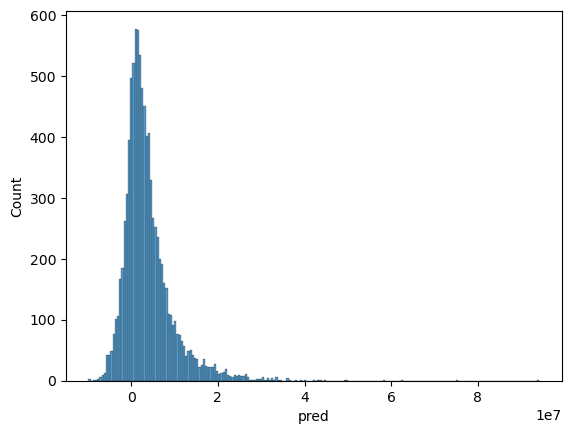

In [106]:
# lets look at the distribution of the target:
sns.histplot(bl_train,x='pred')
plt.show()

In [107]:
# So we are getting negative numbers, this is not good!

In [108]:
# Baseline model, what we want to beat! With log(1+x)

general = em.general_Regression(train,type='LR', scale='log')
general.perform_CV()

MSE for train: mean: 0.9718164149663101 std: 0.006342523732242709
MSE for test:  mean: 0.9921637184791379  std: 0.056137283121664806

RMSE for train: mean: 0.9858022401021957 std: 0.003218443071235086
RMSE for test: mean: 0.9956784978399931 std: 0.02807218228483316

R^2 for train: mean: 0.4981374205877124 std: 0.003474816348959797
R^2 for test: mean: 0.4863840926024576 std: 0.03369637922275931

MAE for train: mean: 0.7713606371136246 std: 0.002240436248096857
MAE for test: mean: 0.7777574257083772 std: 0.019352880107775722

MAPE for train: mean: 0.055535082158550145 std: 0.0001856827653518238
MAPE for test: mean: 0.05597502483068435 std: 0.0016292739650973025



In [109]:
# experiment and look at the residuals and predictions:
bl_train = train.copy()
bl_train['adjusted_market_value'] = general.scale_target(bl_train['adjusted_market_value'])
bl_train['pred'] = general.predict(bl_train)
bl_train['residual'] = general.scale_target(bl_train[general.target]) - bl_train['pred']
bl_train.head()

,name,dob,pos,height,foot,date,market_value,adjusted_market_value,team,league,...,accuratePass,accurateLongBalls,accurateCross,accurateKeeperSweeper,expectedAssists,expectedGoals,xGChain,xGBuildup,pred,residual
0,noah mbamba,2005-01-04,D,187.0,right,2024-02-03,3000000.0,14.914123,Bayer 04 Leverkusen,Bundesliga,...,13.523810,0.619048,0.047619,0.000000,0.025627,0.001195,0.000000,0.000000,13.602267,-10.835060
1,zachary duncan,2000-05-29,M,183.0,right,2021-11-07,300000.0,12.815613,AGF,Superligaen,...,9.000000,0.458333,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,13.500276,-10.874476
2,manuel neuer,1986-03-26,G,193.0,right,2024-10-19,4000000.0,15.201805,FC Bayern München,Bundesliga,...,27.122881,5.411017,0.000000,0.495763,0.001084,0.000969,0.271096,0.270107,15.974872,-13.189750
3,mickel miller,1995-12-01,M,173.0,left,2024-04-12,250000.0,12.429220,Plymouth Argyle,Championship,...,13.837209,0.697674,0.418605,0.000000,0.067950,0.015244,0.000000,0.000000,13.627130,-11.029697
4,gaetano monachello,1994-03-02,F,185.0,left,2016-05-15,900000.0,13.991030,Atalanta,Serie A,...,5.700000,0.200000,0.100000,0.000000,0.000000,0.111925,0.161218,0.061587,14.190491,-11.483039


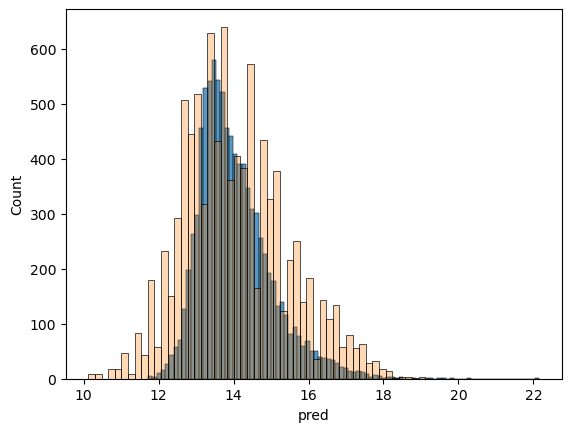

In [110]:
# lets look at the distribution of the target:
fig,ax = plt.subplots()
sns.histplot(bl_train,x='pred')
sns.histplot(bl_train,x='adjusted_market_value',alpha=0.3)
plt.show()

In [133]:
# Finally, lets try a GBR model on the whole feature space:

GBR_general = em.general_Regression(train,scale='log',type='GBR',max_depth= 2, n_estimators= 40, min_samples_split= 10, min_samples_leaf= 2, bootstrap= True)
GBR_general.perform_CV()

MSE for train: mean: 0.6091010826258227 std: 0.00923399541141376
MSE for test:  mean: 0.6960880877918335  std: 0.048149941309512674

RMSE for train: mean: 0.7804267499410623 std: 0.0059304807775710225
RMSE for test: mean: 0.833825427121665 std: 0.028692244199548907

R^2 for train: mean: 0.6854550574690992 std: 0.0044888501822937105
R^2 for test: mean: 0.639981604758725 std: 0.022257231426323885

MAE for train: mean: 0.6053980704744953 std: 0.004223787643106366
MAE for test: mean: 0.6474260938779878 std: 0.0189370629195927

MAPE for train: mean: 0.04349664793364326 std: 0.0003035909952314511
MAPE for test: mean: 0.04646953768203312 std: 0.0014481104093461551



In [134]:
# experiment and look at the residuals and predictions:
gbr_train = train.copy()
gbr_train['adjusted_market_value'] = general.scale_target(gbr_train['adjusted_market_value'])
gbr_train['pred'] = general.predict(gbr_train)
gbr_train['residual'] = general.scale_target(gbr_train[general.target]) - gbr_train['pred']
gbr_train.head()

,name,dob,pos,height,foot,date,market_value,adjusted_market_value,team,league,...,accuratePass,accurateLongBalls,accurateCross,accurateKeeperSweeper,expectedAssists,expectedGoals,xGChain,xGBuildup,pred,residual
0,noah mbamba,2005-01-04,D,187.0,right,2024-02-03,3000000.0,14.914123,Bayer 04 Leverkusen,Bundesliga,...,13.523810,0.619048,0.047619,0.000000,0.025627,0.001195,0.000000,0.000000,13.602267,-10.835060
1,zachary duncan,2000-05-29,M,183.0,right,2021-11-07,300000.0,12.815613,AGF,Superligaen,...,9.000000,0.458333,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,13.500276,-10.874476
2,manuel neuer,1986-03-26,G,193.0,right,2024-10-19,4000000.0,15.201805,FC Bayern München,Bundesliga,...,27.122881,5.411017,0.000000,0.495763,0.001084,0.000969,0.271096,0.270107,15.974872,-13.189750
3,mickel miller,1995-12-01,M,173.0,left,2024-04-12,250000.0,12.429220,Plymouth Argyle,Championship,...,13.837209,0.697674,0.418605,0.000000,0.067950,0.015244,0.000000,0.000000,13.627130,-11.029697
4,gaetano monachello,1994-03-02,F,185.0,left,2016-05-15,900000.0,13.991030,Atalanta,Serie A,...,5.700000,0.200000,0.100000,0.000000,0.000000,0.111925,0.161218,0.061587,14.190491,-11.483039


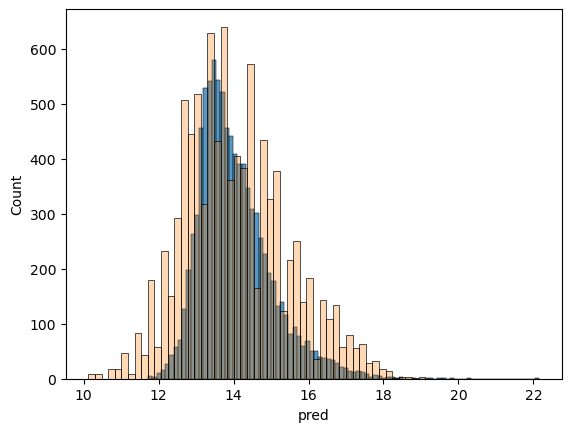

In [135]:
# lets look at the distribution of the target:
fig,ax = plt.subplots()
sns.histplot(gbr_train,x='pred')
sns.histplot(gbr_train,x='adjusted_market_value',alpha=0.3)
plt.show()

#### Furthermore, lets look at how each of the variables 

### Position models
The classes G_Pos, D_Pos, M_Pos, F_Pos, are inherited classes of the general_Regression model above, but specificalyly designed to take in X that only correspond to its position.   If you look at the code in ensamble_mode.py, you can see what features it has for each position, which is what it is using for its model.  Since this is inherits the code from general_Regression, it has all the features of that class.

#### Model for Goalkeepers

In [111]:
#base line model for the G-position
g_model = em.G_Pos(train, scale = 'log')
g_model.perform_CV()


MSE for train: mean: 1.22591402345411 std: 0.006828025727353453
MSE for test:  mean: 1.2314295300362061  std: 0.062059345086368005

RMSE for train: mean: 1.1072057193888885 std: 0.003085191508442723
RMSE for test: mean: 1.1093485822244284 std: 0.02784336820244279

R^2 for train: mean: 0.36692526251810664 std: 0.002074083260167264
R^2 for test: mean: 0.3633141191758053 std: 0.019922672686285878

MAE for train: mean: 0.8809492466319812 std: 0.0021147368907913967
MAE for test: mean: 0.8826425924614609 std: 0.01884921484786094

MAPE for train: mean: 0.06322154612302026 std: 0.00016149021925134568
MAPE for test: mean: 0.06333693700665695 std: 0.0014310499490877236



In [112]:
g_hp = em.hyperparameter_tuning_general(train,n_iter=100,cv=3,scale='log',beta=1)
print(g_hp.best_score)
print(g_hp.best_params)

0.926057416389459
{'model': 'GBR', 'param': {'max_depth': 2, 'n_estimators': 40, 'min_samples_split': 10, 'min_samples_leaf': 2, 'bootstrap': False}}


In [113]:
# Checking better model from hyperparameter tuning
g_hp.best_model.perform_CV()

MSE for train: mean: 0.5779578617139622 std: 0.007123676917523165
MSE for test:  mean: 0.7267558541507394  std: 0.061708547151824084

RMSE for train: mean: 0.7602209895914777 std: 0.004680672870076675
RMSE for test: mean: 0.8517300852200282 std: 0.03621762115079956

R^2 for train: mean: 0.7032619852928264 std: 0.0032055446645268704
R^2 for test: mean: 0.6256497922849824 std: 0.023391575461076022

MAE for train: mean: 0.5904663654670035 std: 0.004100214783139588
MAE for test: mean: 0.6611954469855772 std: 0.028817759080031275

MAPE for train: mean: 0.04235407790393745 std: 0.00030497223167698324
MAPE for test: mean: 0.04735429211995063 std: 0.001969592436467966



In [114]:
em.save_general(save_dir,'G',g_hp.best_params,g_hp.best_score,RMSE_train=g_hp.best_RMSE_train,RMSE_test=g_hp.best_RMSE_test)

In [115]:
# note that this model is overfitting: so we need change 

In [116]:
# baseline model for the D-position
d_model = em.D_Pos(train,scale='log')
d_model.perform_CV()

MSE for train: mean: 0.987961258589283 std: 0.006683446288828691
MSE for test:  mean: 1.0063665170562737  std: 0.05897083160872448

RMSE for train: mean: 0.9939567128459608 std: 0.0033632689061735208
RMSE for test: mean: 1.0027500638763334 std: 0.029305740944106484

R^2 for train: mean: 0.48980112750348315 std: 0.0034804301073545476
R^2 for test: mean: 0.4791353808264889 std: 0.03334695611751453

MAE for train: mean: 0.7761123498824782 std: 0.0024231706258158446
MAE for test: mean: 0.78161709972238 std: 0.021594302801163517

MAPE for train: mean: 0.05585964255073576 std: 0.00019635286940125835
MAPE for test: mean: 0.056234200798305836 std: 0.0017530010961269086



In [117]:
# Lets look at the D-position and try to make it better.
#from hypertuning, it looks like random forest regressor works well

d_hp = em.hyperparameter_tuning_general(train,n_iter=100,cv=3,scale='log',beta=1)
print(d_hp.best_params)
print(d_hp.best_params)

{'model': 'GBR', 'param': {'max_depth': 3, 'n_estimators': 10, 'min_samples_split': 10, 'min_samples_leaf': 8, 'bootstrap': True}}
{'model': 'GBR', 'param': {'max_depth': 3, 'n_estimators': 10, 'min_samples_split': 10, 'min_samples_leaf': 8, 'bootstrap': True}}


In [118]:
d_hp.best_model.perform_CV()

MSE for train: mean: 0.6616076038707491 std: 0.01073962035027162
MSE for test:  mean: 0.7759313222741729  std: 0.05708215405772423

RMSE for train: mean: 0.8133658420574351 std: 0.006603850766675557
RMSE for test: mean: 0.8802727064352259 std: 0.0324235189233935

R^2 for train: mean: 0.6603080176771233 std: 0.005527370867167521
R^2 for test: mean: 0.5996292074293407 std: 0.028266267485306116

MAE for train: mean: 0.6353475658097283 std: 0.006706623103133033
MAE for test: mean: 0.6871639153867849 std: 0.024796535445148735

MAPE for train: mean: 0.04548459655666358 std: 0.0004587625508118811
MAPE for test: mean: 0.04909963529009677 std: 0.00174855107123002



In [119]:
em.save_general(save_dir,'D',d_hp.best_params,d_hp.best_score,RMSE_train=d_hp.best_RMSE_train,RMSE_test=d_hp.best_RMSE_test)

In [120]:
#baseline model for the M-position
m_model = em.M_Pos(train,scale='log')
m_model.perform_CV()

MSE for train: mean: 0.9843446354184389 std: 0.006599502477681897
MSE for test:  mean: 1.0026610274759913  std: 0.05822550588149237

RMSE for train: mean: 0.9921358620155323 std: 0.003326668173367171
RMSE for test: mean: 1.000909066751958 std: 0.02901840053682956

R^2 for train: mean: 0.4916687454630805 std: 0.003446101566907866
R^2 for test: mean: 0.4810508179921594 std: 0.0330444951431252

MAE for train: mean: 0.7752565200774655 std: 0.002377056734925064
MAE for test: mean: 0.7809257187143217 std: 0.021203109052552745

MAPE for train: mean: 0.05580615727370001 std: 0.00019403533453101713
MAPE for test: mean: 0.056191755968460246 std: 0.0017327890978573784



In [121]:
# Lets improve the m-model
m_hp = em.hyperparameter_tuning_general(train,n_iter=100,cv=3,scale='log',beta=1)
print(m_hp.best_score)
print(m_hp.best_params)

0.9171053285826617
{'model': 'GBR', 'param': {'max_depth': 2, 'n_estimators': 20, 'min_samples_split': 10, 'min_samples_leaf': 6, 'bootstrap': True}}


In [122]:
m_hp.best_model.perform_CV()

MSE for train: mean: 0.6571255794556076 std: 0.011413599810703563
MSE for test:  mean: 0.7526382266606279  std: 0.05352917139374644

RMSE for train: mean: 0.8106024353730286 std: 0.007019346331570132
RMSE for test: mean: 0.8669937902272016 std: 0.03098377588511453

R^2 for train: mean: 0.6626152187533498 std: 0.005499814401626602
R^2 for test: mean: 0.6120912555890515 std: 0.020973718681366684

MAE for train: mean: 0.6323191713479285 std: 0.006460073014454721
MAE for test: mean: 0.6769787819336057 std: 0.026800470878852133

MAPE for train: mean: 0.04529731589232701 std: 0.0004671244265880062
MAPE for test: mean: 0.04842174163383125 std: 0.0018345572159414437



In [123]:
em.save_general(save_dir,'M',m_hp.best_params,m_hp.best_score,RMSE_train=m_hp.best_RMSE_train,RMSE_test=m_hp.best_RMSE_test)

In [124]:
#Baseline model for $F$-position
f_model = em.F_Pos(train,scale='log')
f_model.perform_CV()

MSE for train: mean: 0.987961258589283 std: 0.006683446288828691
MSE for test:  mean: 1.0063665170562737  std: 0.05897083160872448

RMSE for train: mean: 0.9939567128459608 std: 0.0033632689061735208
RMSE for test: mean: 1.0027500638763334 std: 0.029305740944106484

R^2 for train: mean: 0.48980112750348315 std: 0.0034804301073545476
R^2 for test: mean: 0.4791353808264889 std: 0.03334695611751453

MAE for train: mean: 0.7761123498824782 std: 0.0024231706258158446
MAE for test: mean: 0.78161709972238 std: 0.021594302801163517

MAPE for train: mean: 0.05585964255073576 std: 0.00019635286940125835
MAPE for test: mean: 0.056234200798305836 std: 0.0017530010961269086



In [125]:
# Lets improve the F-model
f_hp = em.hyperparameter_tuning_general(train,n_iter=100,cv=3,scale='log',beta=1)
print(f_hp.best_score)
print(f_hp.best_params)

0.9486267856353562
{'model': 'GBR', 'param': {'max_depth': 2, 'n_estimators': 60, 'min_samples_split': 5, 'min_samples_leaf': 2, 'bootstrap': False}}


In [126]:
f_hp.best_model.perform_CV()

MSE for train: mean: 0.5337471923652722 std: 0.006116012555285683
MSE for test:  mean: 0.7299847339126884  std: 0.05959562438718384

RMSE for train: mean: 0.7305680651184386 std: 0.004182653986778791
RMSE for test: mean: 0.8536916721175413 std: 0.034572573954580355

R^2 for train: mean: 0.7259600188438627 std: 0.0027660043510288326
R^2 for test: mean: 0.6235638728341991 std: 0.027910283315455222

MAE for train: mean: 0.5665940739840942 std: 0.0039002662695023314
MAE for test: mean: 0.6612274208188769 std: 0.027247786258200096

MAPE for train: mean: 0.040674016614414096 std: 0.00030019207921376024
MAPE for test: mean: 0.04733971303396818 std: 0.0018161910458927425



In [127]:
em.save_general(save_dir,'F',f_hp.best_params,f_hp.best_score,RMSE_train=f_hp.best_RMSE_train,RMSE_test=f_hp.best_RMSE_test)

## The ensamble model
This is a new class that builds a model for all the positions and puts it together.  The way to set it up is as follows in the next cell.

In [33]:
# To set up the ensamble model with your specifications we do the following:

ex = em.ensamble_model(scale='log')    # this sets up the class ready to take inthe parameters and the data for fitting

ex.G_parameters(type = 'LR') # put the parameters for the G model as just linear regression
ex.D_parameters(type = 'RIDGE', alpha=5)  # puts the parameters for the D model as just linear regression with ridge regularization
ex.F_parameters(type='RFR', max_depth=10)   # puts the forwards parameters as random forest with max depth of 10

# Note that any left our parameters changes, for example M here, is left as just Linear regression

# Once you set up what your model is, we can fit the data to it
ex.fit(train)

# It is now fitted to the data and read to predict things:
result = train.copy()
result[ex.target] = ex.scale_target(result[ex.target])

result['prediction']= ex.predict(train)
result['residual'] = abs(result[ex.target] - result['prediction'])

display(result)


,name,dob,pos,height,foot,date,market_value,adjusted_market_value,team,league,...,accuratePass,accurateLongBalls,accurateCross,accurateKeeperSweeper,expectedAssists,expectedGoals,xGChain,xGBuildup,prediction,residual
0,noah mbamba,2005-01-04,D,187.0,right,2024-02-03,3000000.0,14.914123,Bayer 04 Leverkusen,Bundesliga,...,13.523810,0.619048,0.047619,0.000000,0.025627,0.001195,0.000000,0.000000,13.625808,1.288315
1,zachary duncan,2000-05-29,M,183.0,right,2021-11-07,300000.0,12.815613,AGF,Superligaen,...,9.000000,0.458333,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,13.514280,0.698667
2,manuel neuer,1986-03-26,G,193.0,right,2024-10-19,4000000.0,15.201805,FC Bayern München,Bundesliga,...,27.122881,5.411017,0.000000,0.495763,0.001084,0.000969,0.271096,0.270107,15.496563,0.294758
3,mickel miller,1995-12-01,M,173.0,left,2024-04-12,250000.0,12.429220,Plymouth Argyle,Championship,...,13.837209,0.697674,0.418605,0.000000,0.067950,0.015244,0.000000,0.000000,13.544847,1.115626
4,gaetano monachello,1994-03-02,F,185.0,left,2016-05-15,900000.0,13.991030,Atalanta,Serie A,...,5.700000,0.200000,0.100000,0.000000,0.000000,0.111925,0.161218,0.061587,14.057601,0.066571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9362,michael svoboda,1998-10-14,D,195.0,right,2024-10-20,1500000.0,14.220976,Venezia,Serie A,...,29.730769,2.653846,0.038462,0.000000,0.038870,0.042371,0.117319,0.117319,14.464836,0.243859
9363,kalifa coulibaly,1991-08-20,F,197.0,right,2022-05-21,1500000.0,14.370794,Nantes,Ligue 1,...,7.405941,0.099010,0.069307,0.000000,0.050634,0.219190,0.265225,0.053416,14.450305,0.079512
9364,nordin jackers,1997-09-04,G,185.0,right,2024-04-28,900000.0,13.710151,Club Brugge KV,"First Division A, Championship Round",...,20.742857,10.514286,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,13.666569,0.043582
9365,mads kikkenborg,1999-10-06,G,197.0,right,2023-12-03,800000.0,13.647174,Lyngby,Superligaen,...,16.488372,7.023256,0.000000,0.488372,0.000000,0.000000,0.000000,0.000000,13.922657,0.275484


# Now lets say you want to figure out which model is the best through a cross-validation.
You can do the above, but now you use a perform_CV(train) to do a cross-validation with the type of parameters you put in
For example:

In [36]:
# make the ensamble model object
ensamble = em.ensamble_model(scale='log')

ensamble.G_parameters(type = 'DT') # put the parameters for the G model as just linear regression
ensamble.D_parameters(type = 'RIDGE', alpha=5)  # puts the parameters for the D model as just linear regression with ridge regularization
ensamble.F_parameters(type='RFR', max_depth=10)   # puts the forwards parameters as random forest with max depth of 10

ensamble.perform_CV(train)

MSE for train: mean: 0.7447681352296309 std: 0.006134996963473714
MSE for test:  mean: 0.9970257610457217  std: 0.06568384573124325

RMSE for train: mean: 0.8629921916154022 std: 0.003551399791051874
RMSE for test: mean: 0.9979734327488321 std: 0.0327839682350073

R^2 for train: mean: 0.6153933446381987 std: 0.002741171726794568
R^2 for test: mean: 0.4842985102039633 std: 0.031129588333427292

MAE for train: mean: 0.6420626256506956 std: 0.002477738683135178
MAE for test: mean: 0.7771672055319406 std: 0.020928391000426858

MAPE for train: mean: 0.04608210603021121 std: 0.00018383726205094345
MAPE for test: mean: 0.05585562483149635 std: 0.001628357580220057



In [136]:
ex = em.ensamble_model(scale='log')
ex.G_parameters(type ='GBR',max_depth = 2, n_estimators = 10,max_features = 0.75, min_samples_split = 5, min_samples_leaf=4,
                bootstrap=True)
ex.D_parameters(type ='GBR', max_depth= 2, n_estimators= 40, max_features= 'sqrt', min_samples_split= 10,
                 min_samples_leaf=2, bootstrap= True )
ex.M_parameters(type='GBR',max_depth=2, n_estimators= 40, max_features= 0.25, min_samples_split= 5,
                 min_samples_leaf=1, bootstrap= True)
ex.F_parameters(type = 'GBR',max_depth= 2, n_estimators= 40, max_features= 0.5, min_samples_split= 2,
                 min_samples_leaf= 5, bootstrap=True)
ex.perform_CV(train)

MSE for train: mean: 0.5561818203536892 std: 0.009326633230795934
MSE for test:  mean: 0.8100187647736947  std: 0.04441621802259298

RMSE for train: mean: 0.7457500154828011 std: 0.00622372566002649
RMSE for test: mean: 0.8996689820201841 std: 0.024788859684547616

R^2 for train: mean: 0.7127883195319396 std: 0.004211308847806872
R^2 for test: mean: 0.5805406425288293 std: 0.028458879855777754

MAE for train: mean: 0.579916626901889 std: 0.0048769916873555134
MAE for test: mean: 0.7013454542399977 std: 0.017704400540275056

MAPE for train: mean: 0.04170923151690381 std: 0.0003508825107627437
MAPE for test: mean: 0.050235121792101746 std: 0.001354052628961786



In [129]:
ex_data = train.copy()
ex.fit(ex_data)
ex_data['pred'] = ex.predict(ex_data)
ex_data['adjusted_market_value'] = ex.scale_target(ex_data['adjusted_market_value'])
ex_data.head()

,name,dob,pos,height,foot,date,market_value,adjusted_market_value,team,league,...,rating,accuratePass,accurateLongBalls,accurateCross,accurateKeeperSweeper,expectedAssists,expectedGoals,xGChain,xGBuildup,pred
0,noah mbamba,2005-01-04,D,187.0,right,2024-02-03,3000000.0,14.914123,Bayer 04 Leverkusen,Bundesliga,...,5.414286,13.523810,0.619048,0.047619,0.000000,0.025627,0.001195,0.000000,0.000000,14.150013
1,zachary duncan,2000-05-29,M,183.0,right,2021-11-07,300000.0,12.815613,AGF,Superligaen,...,6.545833,9.000000,0.458333,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,13.511133
2,manuel neuer,1986-03-26,G,193.0,right,2024-10-19,4000000.0,15.201805,FC Bayern München,Bundesliga,...,6.536864,27.122881,5.411017,0.000000,0.495763,0.001084,0.000969,0.271096,0.270107,15.290037
3,mickel miller,1995-12-01,M,173.0,left,2024-04-12,250000.0,12.429220,Plymouth Argyle,Championship,...,6.551163,13.837209,0.697674,0.418605,0.000000,0.067950,0.015244,0.000000,0.000000,14.164976
4,gaetano monachello,1994-03-02,F,185.0,left,2016-05-15,900000.0,13.991030,Atalanta,Serie A,...,6.550000,5.700000,0.200000,0.100000,0.000000,0.000000,0.111925,0.161218,0.061587,15.274481


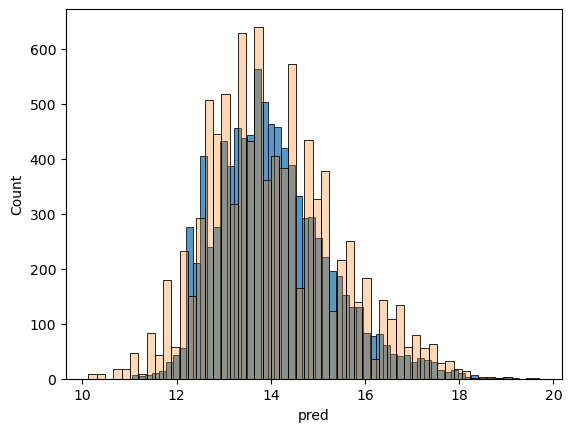

In [130]:
# Histogram for our model
fig,ax = plt.subplots()
sns.histplot(ex_data,x='pred',ax=ax)
sns.histplot(ex_data,x='adjusted_market_value',ax=ax,alpha=0.3)
plt.show()

## Hyperparameter tuning

This takes in the set of possible parameters defined in the ensamble_model.py and randomly chooses them as it goes through the n_iter=100

In [ ]:
# Lets try some hyperparameter tuning:

hp = em.hyperparameter_tuning(train,n_iter=1000,cv=4,scale='log',beta=1)

# After it gets done doing its hyperparameter tuning, it saves the best model, the parameters for that model, and the score 
# (which is just RMSE for now, I can change it later to do what ever score you want to use)

print(hp.best_params)  # Best parameters in a dictionary object
print(hp.best_score)   # the best RMSE
print(hp.best_model)   # the ensamble_model() object that has the best parameters above and score.

# You can now use the hp.best_model to do predictions and we can save it later once we have the one we want.

# you can now do 
best_model_prediction = hp.best_model.predict(train)


{'G': {'model': 'KNN', 'param': {'n_neighbors': 6}}, 'D': {'model': 'RFR', 'param': {'max_depth': None, 'n_estimators': 50, 'max_features': 0.5, 'min_samples_split': 10, 'min_samples_leaf': 1, 'bootstrap': False}}, 'M': {'model': 'RFR', 'param': {'max_depth': 10, 'n_estimators': 20, 'max_features': 0.75, 'min_samples_split': 5, 'min_samples_leaf': 2, 'bootstrap': True}}, 'F': {'model': 'GBR', 'param': {'max_depth': 5, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 7, 'bootstrap': False}}}
0.9097402676223301


In [11]:
hp.best_model.perform_CV(train)

NameError: name 'hp' is not defined